# Tópicos Avanzados de Estadística

## Tarea 2: Entendiendo Jupyter Lab, Github, Python y Regresión Lineal

### Presentado por: 
- Miguel Ángel Quintero
            

#1. Introducción
En la actualiadad cualquier tipo de proceso nos brinda información, tal como la temperatura, presión, ratio de consumo, etc. Muchas de estas variables se encuentran en intervalos de tiempo, o en distintas cantidades, y en muchas ocasiones despues de un análisis o una medición, se obtiene una variable respuesta. El objetivo es usualmente intentar utilizar estas variables y el análisis realizado sobre estas para reproducir un experimento, intentar mejorarlo, y obtener resultados deseados (Draper & Smith, 1998).

Los modelos de regresión son técnicas que pueden ser usadas en este tipo de situaciones. En particular, las regresiones lineales intentan modelar un conjunto de variables independientes mediante una relación lineal con una variable dependiente. Este tipo de modelamientos permiten tanto inferencias sobre las variables y su naturaleza, como tambien permiten realizar predicciones cuando el modelo parece describir muy bien el comportamiento. En este sentido, estudiar estos modelos es de gran importancia, ya que al ser el modelo más sencillo de regresión, es ampliamente usado por cualquier persona independientemente de su industría. Un ejemplo de su amplia aplicación es en el Machine Learning, donde muchos modelos buscan hacer predicciones apartir de una regresión lineal sobre las variables descritas.

En este sentido, este documento presenta de manera general los fundamentos teoricos y un ejemplo de aplicación de la regresión lineal. Para este proposito, este documento se organiza de la siguiente manera; primero, se presenta una breve historia de la regresión lineal y sus origenes; segundo, se realiza el planteamiento teórico del algoritmo; tercero, se presenta un ejemplo de regresión lineal en Python; y finalmente, se presentan las conclusiones de este trabajo.

# 2. Historia
Las primeras formas de regresión fue el método de mínimos cuadrados, el cual fue desarrollado en el área de astronomía, ya que los cientificos buscaban dar soluciones a los distintos desafios de la navegación en los oceanos. Era necesario que estas descripciones tuvieran una gran descripción del comportamiento de los cuerpos celestes, ya que eran el pilar para que los barcos pudiesen navegar en oceanos abiertos, donde los marineros no podían observar nada. [Wikipedia - Least Squares](https://en.wikipedia.org/wiki/Least_squares).

El término regresión fue utilizado por Francis Galton en el siglo diecinueve para describir fenomenos biologicos. Si bien inicialmente sus métodos eran únicamente para la biología, poco a poco empezaron a extenderse a un  contexto más general estadístico. Finalmente en el siglo veinte empezó a utilizarse de manera mucho más generalizada por los economistas por medio de la tecnología que permitia realizar las regresiones de manera mucho más rapida.

Actualmetne los modelos de regresión, y en particular la regresión lineal, se utilizan en una gran diversidad de áreas. Su uso se ha extendido ampliamente en el Machine Learning para predicciones sin necesariamente tener un background estadístico.

# 3. Planteamiento

#3.1. El modelo de regresión
Dado un conjunto de datos $\{y_{i}, x_{i1},\dots,x_{in}\}_{i=1}^{N}$, el modelo de regresión asume que existe una relación lineal entre la variable *dependiente* $y$ con las variables *independientes* $x$. Esta relación se modela por medio de un término de error $\varepsilon_{i}$, el cual es una variable aletoria que agrega un parámetro de ruido a dicha relación. Por lo cual, de manera general, el modelo puede tomar la siguiente forma [[Linear Regression - Wikipedia]](https://en.wikipedia.org/wiki/Linear_regression#Introduction):

$$y_{i}=\beta_0+\beta_0x_{i1}+\dots+\beta_{n} x_{in}+\varepsilon_{i}\quad\text{, }i=1,\dots,n$$

O de manera matricial:
$$\mathbf{Y}=\mathbf{X}\mathbf{\beta}+\mathbf{\varepsilon}$$

Por lo cual, el objetivo del modelo lineal es encontrar el valor de los parámetros $\beta$ y describir la relación entre las dos variables.

## 3.2. Estimación de los parámetros

Para la estimación de los parámetros, se puede utilizar el método de minimos cuadrados. En este caso, el método lo que busca es minimizar la siguiente ecuación para el modelo lineal simple (Hocking, 2013):

$$Q(\beta_{0},\beta_{1})=\sum_{i=1}^{N}(y_{i}-\beta_{0}-\beta_{1}x_{i})^{2}$$

Dicha minimización se lleva acabo realizando las derivadas parciales de la función $Q(\beta_{0},\beta_{1})$ e igualando a 0, de tal manera que:

$$\frac{\partial Q}{\partial \beta_{0}}=0\quad\text{y}\quad\frac{\partial Q}{\partial \beta_{1}}=0$$

De esta manera, se obtiene que los parámetros serán igual a:

$$\hat{\beta}_{0}= \frac{1}{N}\sum_{i=1}^{N}(y_{i}-\beta_{1}x_{i})\\
\hat{\beta}_{1}= \frac{S_{xy}}{S_{xx}}$$


Dichos resultados se pueden generalizar a N variables, no obstante, la metodología es análoga. Así, finalmente, se obtiene que la regresión lineal estará dada por la siguiente ecuación:

$$\hat{y}=\hat{\beta}_{0}+\hat{\beta}_{1}x$$

A modo de ejemplo, [la siguiente gráfica](https://en.wikipedia.org/wiki/Linear_regression#/media/File:Linear_regression.svg) presenta un una regresión lineal para un conjunto de datos. En este caso, cuando se realiza una regresión con una sola variable independiente, se le llama regresión lineal simple. 

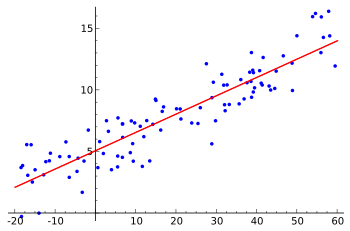


# 4. Ejemplo de regresión lineal

En la primera celda se importan las siguientes librerias:

- **Numpy**: Para el manejo de arreglos.
- **Matplotlib**: Para la visualización de la regresión lineal.
- **Pandas**: Para el manejo del dataframe.
- **sklearn**: Para usar los datasets ahí incluidos para el ejemplo y la posterior regresión lineal.


En primer lugar se realiza la carga del dataset boston. Este dataset nos dice el precio de las casas de boston según otras 13 variables. En este caso, solo nos enfocaremos en la variable *LSTAT* que nos indica la proporción de la población que tiene un estatus menor, esto es, la proporción de adultos sin una educación secundaria entre otros factores. De esta manera el ejemplo corresponderá a una regresión lineal simple.

Una vez se importa el dataset, por medio de pandas se convierte en un dataframe para facilitar su manejo.

In [82]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from sklearn import datasets
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

data = datasets.load_boston()
df_x = pd.DataFrame(data.data,columns=data.feature_names)
df_y = pd.Series(data.target)
df_x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


Como solo nos interesa la variable CRIM, actualizamos el dataframe para solo tener la variable dependiente (precios de la vivienda) y la variable independiente (LSTAT).

Posteriormente se realiza el gráfico en matplotlib para visualizar los datos, donde se puede observar una relación entre las variables.

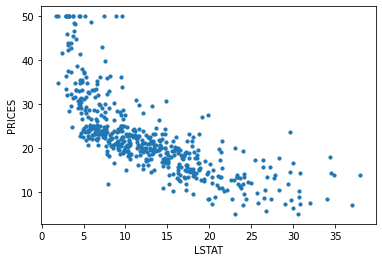

In [83]:
X = np.array(df['LSTAT'])


plt.scatter(X,df_y,s=10)
plt.xlabel('LSTAT')
plt.ylabel('PRICES')
plt.show()

De esta manerase procede a hacer la regresión lineal por medio de la libreria *sklearn* usando *linear_model*. Si bien es posible realizar la regresión lineal multiple con el dataset, se realizará únicamente con una variable para demostrar el método y visualizarlo.

In [90]:
# Inicializamos la regresión
regr = linear_model.LinearRegression()

# Hacemos el entrenamiento del modelo
regr.fit(X.reshape(-1,1),df_y)

#Finalmente se realiza la regresión
y_pred = regr.predict(X.reshape(-1,1))

print('Pendiente: %.2f'% regr.coef_[0])
print('Intercepto: %.2f'% regr.intercept_)
print('R2: %.2f' % r2_score(df_y, y_pred))

Pendiente: -0.95
Intercepto: 34.55
R2: 0.54


Finalmente, utilizando nuevamente **matplotlib** se visualiza la regresión lineal sobre los datos reales. De manera descriptiva se puede observar que si bien los datos parecen presentar algún tipo de linealidad, esta regresión no es adecuada para describir su comportamiento, lo cual tambien se puede observar mediante la métrica $R^{2}$, ya que su valor es aproximadamente $0.54$.



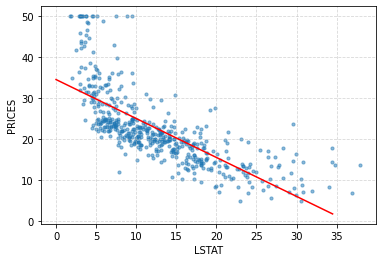

In [80]:
xx = np.arange(0,35,0.5)
yy = regr.coef_[0]*xx+regr.intercept_

plt.scatter(X,df_y,s=10,alpha=0.5)
plt.plot(xx,yy,color='r')
plt.xlabel('LSTAT')
plt.ylabel('PRICES')
plt.grid(alpha=0.5,ls='--')
plt.show()

# 5. Conclusiones

El modelo de regresión lineal al ser uno de los modelos más utilizados y más sencillos de implementar, se ha convertido en uno de los métodos más utilizados para describir relaciones entre variables. En este sentido, librerias como *sklearn* en Python han desarrollado herramientras que permiten hacer el modelamimento de manera rapida, sencilla y de manera adecuada. El ejemplo realizado logra presentar los anteriores aspectos, ya que, sin ser una relación completamente lineal, el algoritmo logra establecer la ecuación lineal con los parámetros estimados y además presenta una métrica como lo es $R^{2}$ que deja evaluar la presición del modelo. En este sentido, es posible realizar modelamientos lineales en Python ya sea para realizar una descripción de la variable o para realizar predicciones.

#6. Referencias

- Draper, N., & Smith, H. (1998). Applied regression analysis (3rd ed., p. 15). New York: John Wiley & Sons.
- Hocking, R. (2013). Methods and Applications of Linear Models: Regression and the Analysis of Variance (2nd ed.). John Wiley & Sons.